# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">References</a></li>   
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description
>**Summary**: This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. There is only one table provided named *'mdb-movies.csv'*

>**columns**:21 columns in total
>1. *id*: the movie's id number in [TMDb](https://www.themoviedb.org/?language=en-US) database.
>2. *imdb_id*: the corresponding id in [IMDb](https://www.imdb.com/) database.
>3. *poplularity*: It's a metric calculated from many numbers, you can check it from [here](https://developers.themoviedb.org/3/getting-started/popularity)
>4. *budget*                      
>5. *revenue*                   
>6. *original_title*: The title of the movie             
>7. *cast*: a string contains main actors and actresses seperated by '|'                     
>8. *homepage*: the official website of the movie                
>9. *director*: the name the director                  
>10. *tagline*: the slogan of the movie                
>11. *keywords*: some words related to the theme of the movie                
>12. *overview*: a short description of the movie                  
>13. *runtime*: how long the movie is, unit is minute.                    
>14. *genres*: a string often contains more than one type, seperated by '|'                   
>15. *production_companies*    
>16. *release_date*: format is month/day/year              
>17. *vote_count*: the number of users that has voted for this movie                
>18. *vote_average*: the average score of the movie, from 0 to 10              
>19. *release_year*                
>20. *budget_adj*: show the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.           
>21. *revenue_adj* : show the revenue  of the associated movie in terms of 2010 dollars, accouting for inflation over time.

### Questions for Analysis
1. **What's the distribution of revenue_adj, budget_adj and vote_average?**
2. **What kind of movie are people more interested in?**
3. **Which release month of the year tend to have higher revenue?**
4. **How does the aveage budget change from 1980 to 2015?**
5. **How do vote_average, vote_count and budget_adj influence the revenue_adj?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
#Load the dataset.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [3]:
#print out 5 lines.
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
# check the columns, corresponding Dtype and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The original dataset has 10886 rows and 21 colunms in total, with many missing values.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It shows that there are more than half of the movies don't have revenue and budget information.


### Data Cleaning

####  Drop Null

In [7]:
#show the percentage of null values in each column
round(df.isnull().sum() / len(df), 4) * 100

id                       0.00
imdb_id                  0.09
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
cast                     0.70
homepage                72.98
director                 0.40
tagline                 25.99
keywords                13.74
overview                 0.04
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
dtype: float64

####  Find the columns with missing data 
* _homepage_ 
* _cast_ 
* _director_ 
* _tag_line_
* _keywords_
* _overview_
* _genres_
* _production_companies_

we can just drop the homepage and tagline columns first since there are too many missing value

In [8]:
df = df.drop(['homepage', 'tagline'], axis = 1)

Because the missing value in `keywords` is also beyond 10% and it is not that important, I think it's better to just drop the whole column too

In [9]:
df = df.drop(['keywords'], axis = 1)

Then I can deal with the remaining NULL values, I decide to keep all the NULL value in `production_companies`.

In [10]:
df = df.dropna(subset = ['cast', 'director', 'overview', 'genres'])

check the percentage of null values in each column again

In [11]:
round(df.isnull().sum() / len(df), 4) * 100

id                      0.00
imdb_id                 0.05
popularity              0.00
budget                  0.00
revenue                 0.00
original_title          0.00
cast                    0.00
director                0.00
overview                0.00
runtime                 0.00
genres                  0.00
production_companies    8.92
release_date            0.00
vote_count              0.00
vote_average            0.00
release_year            0.00
budget_adj              0.00
revenue_adj             0.00
dtype: float64

#### Dedupe

In [12]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
df.loc[2089:2090]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


We find that row 2089 and 2090 are identical, so we drop one.

In [14]:
df = df.drop(index = 2089)

In [15]:
df.duplicated().sum()

0

#### Drop the rows with its budget_adj and revenue_adj less than 10,000 dollars

In [16]:
df = df[df['budget_adj'] >= 1e4]

In [17]:
df = df[df['revenue_adj'] >= 1e4]

#### conver the release_date from string to datetime

In [18]:
df['release_date_new'] = df.release_date.str[:-2]

In [19]:
df['release_date_new'] = df['release_date_new'] + df['release_year'].astype(str)

In [20]:
df['release_date_new'] = pd.to_datetime(df['release_date_new'])

### the dataset after cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 10848
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3797 non-null   int64         
 1   imdb_id               3797 non-null   object        
 2   popularity            3797 non-null   float64       
 3   budget                3797 non-null   int64         
 4   revenue               3797 non-null   int64         
 5   original_title        3797 non-null   object        
 6   cast                  3797 non-null   object        
 7   director              3797 non-null   object        
 8   overview              3797 non-null   object        
 9   runtime               3797 non-null   int64         
 10  genres                3797 non-null   object        
 11  production_companies  3756 non-null   object        
 12  release_date          3797 non-null   object        
 13  vote_count       

<a id='eda'></a>
## Exploratory Data Analysis

before plot any chart, set the size of the picture using seaborn

In [22]:
sns.set(rc = {'figure.figsize': (24,8)})

### Question #1 : What's the distribution of revenue_adj, budget_adj and vote_count?

<AxesSubplot:xlabel='revenue_adj', ylabel='Count'>

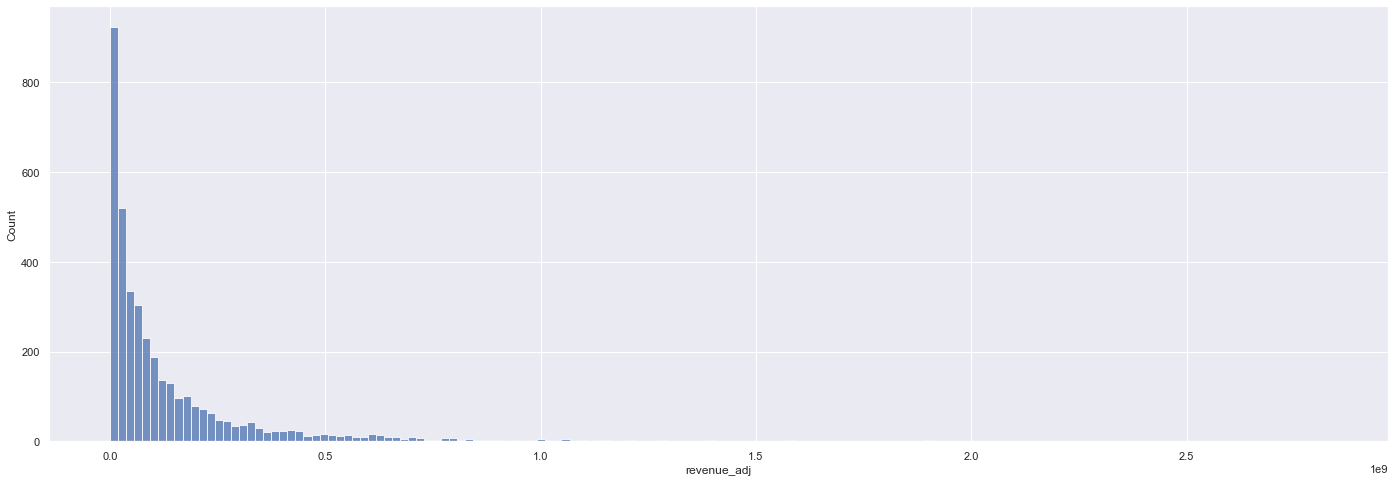

In [23]:
sns.histplot(data = df, x='revenue_adj')

<AxesSubplot:xlabel='budget_adj', ylabel='Count'>

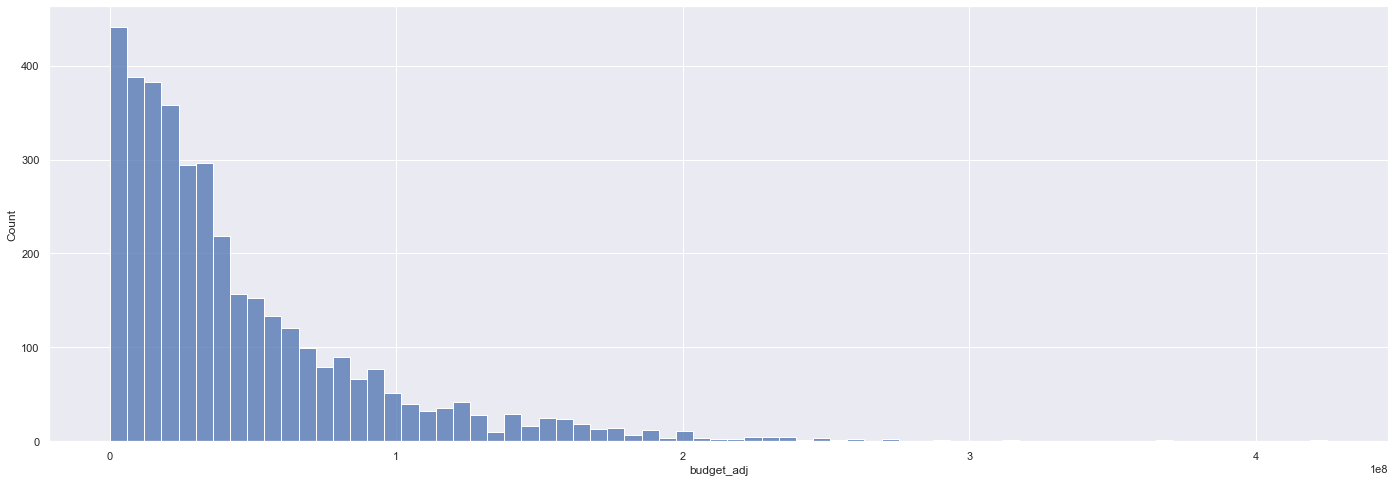

In [24]:
sns.histplot(data = df, x='budget_adj')

#### the revenue_adj and budget_adj are both skewed to the left

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

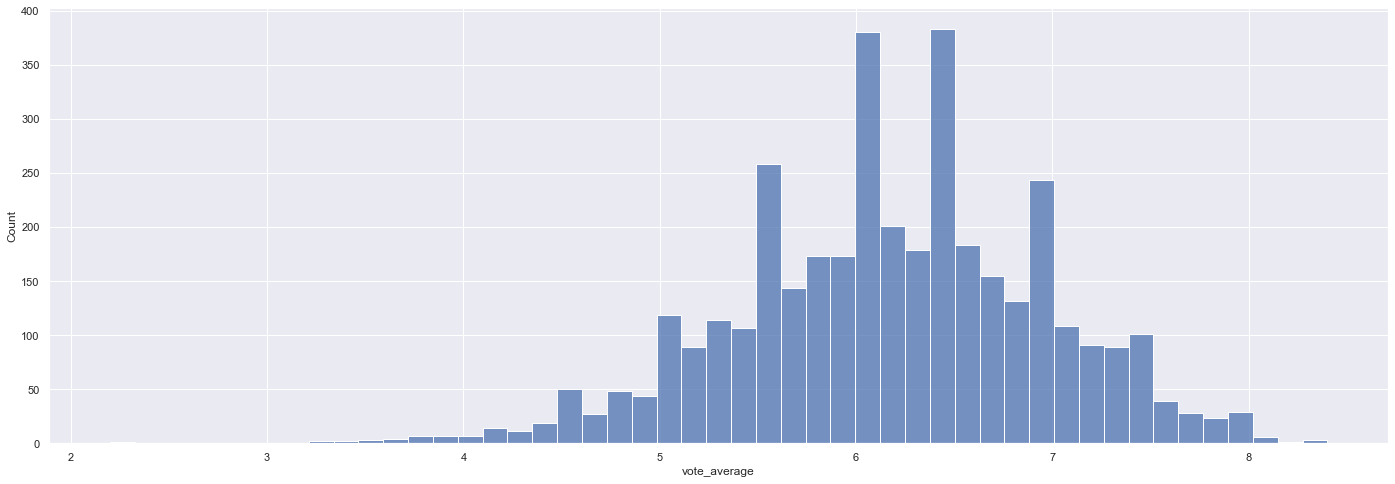

In [25]:
sns.histplot(data = df, x='vote_average')

#### the vote_average has an approximately normal distribution

### Question #2 : What kind of movie are people more interested in?

#### 1. define a function to get all the genres in this dataset

In [26]:
#transform the genres column from string to list 
df.genres = df.genres.str.split('|')

In [27]:
def count_genres(List):
    """
    count how many times each genre in genres
    appears in the Series of list
    
    Parameters
    ----------
    List: Series or list
        A list and its component is list too
        
    Returns
    -------
    Series
        Return a Series, its index is genres
        that appears in List and corresponding 
        value is the count of genre's appearance
    """
    genres = []
    for item in List:
        for genre in item:
            if genre not in genres:
                genres.append(genre)
                
    genres = dict.fromkeys(genres)
    
    for genre in genres.keys():
        sum = 0
        for item in List:
            if genre in item:
                sum = sum + 1
        genres[genre] = sum
    
    genres = pd.Series(genres)
    
    return genres

#### 2. Try to solve this quetion using popularity property

In [28]:
df.sort_values(by = 'popularity', ascending=False, inplace = True, ignore_index=True)

Sort the dataset by `popularity` and select the first 1000 movies

In [29]:
df_popularity_1000 = df.iloc[0:1000]

Count the number for each genres

In [30]:
genres_count = count_genres(df_popularity_1000.genres)
genres_count

Action             387
Adventure          323
Science Fiction    207
Thriller           321
Drama              346
Fantasy            177
Mystery             79
Crime              152
Western              9
Family             168
Animation          105
Comedy             311
History             26
War                 35
Horror              70
Romance            142
Music               29
dtype: int64

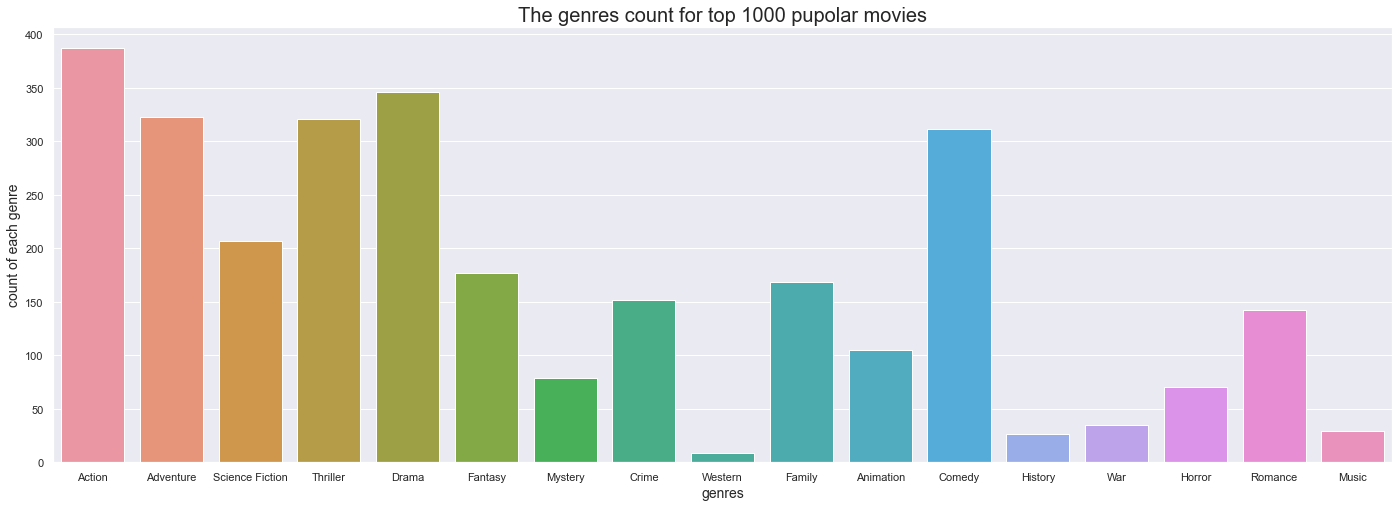

In [31]:
## plot bar chart with seaborn
sns.set(rc = {'figure.figsize': (24,8)})
ax = sns.barplot(x=genres_count.index, y=genres_count.values)
ax.set_title('The genres count for top 1000 pupolar movies', fontsize = 20);
ax.set_xlabel('genres', fontsize = 14)
ax.set_ylabel('count of each genre', fontsize = 14);

#### From the bar chart we can see that Action, Adventure, Comedy, Drama and Thriller movies were much more polular than the other kinds of movies at the time this dataset was generated.
#### 3. solve this question use the vote_count  variable.

The strategy is to choose vote_count to decide the popularity of each movie, sort the dataset by `vote_count`, and select the first 1000 movies

In [32]:
df.sort_values(by = 'vote_count', ascending=False, inplace = True, ignore_index=True)

In [33]:
vote_count_1000 = df.iloc[:1000]

Count the number for each genres

In [34]:
genres_count = count_genres(vote_count_1000.genres)

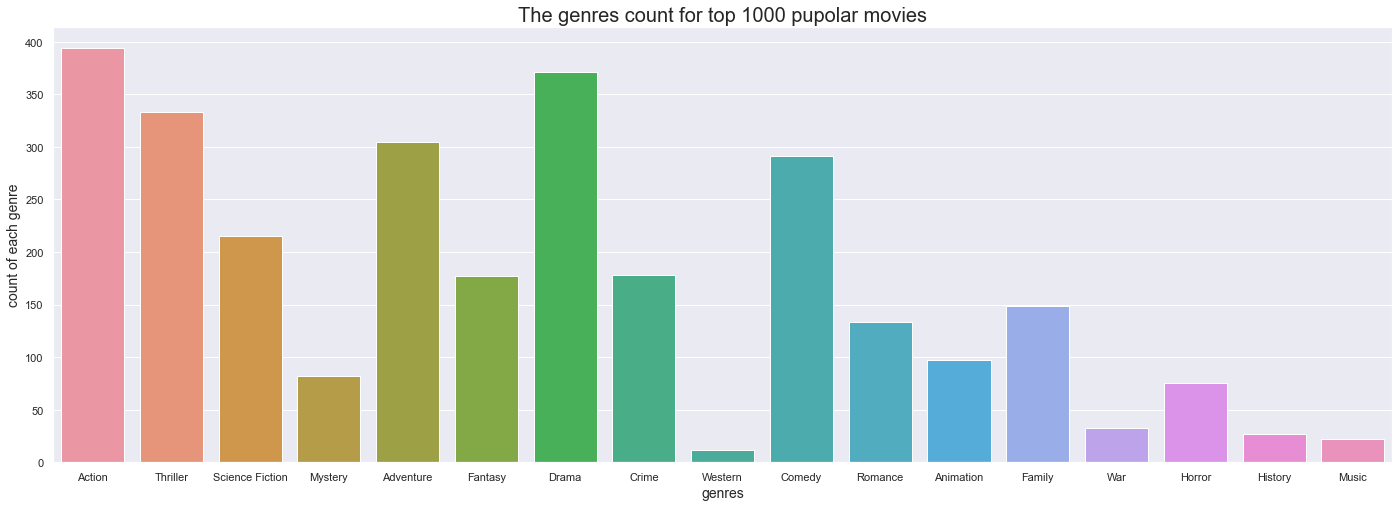

In [35]:
## plot bar chart with seaborn
ax = sns.barplot(x=genres_count.index, y=genres_count.values)
ax.set_title('The genres count for top 1000 pupolar movies', fontsize = 20)
ax.set_xlabel('genres', fontsize = 14)
ax.set_ylabel('count of each genre', fontsize = 14);

#### We can draw the same conclusion that Action, Adventure, Comedy, Drama and Thriller movies were the most popular types of movies at that time

### Question #2: Which release month of the year tend to have higher revenue?

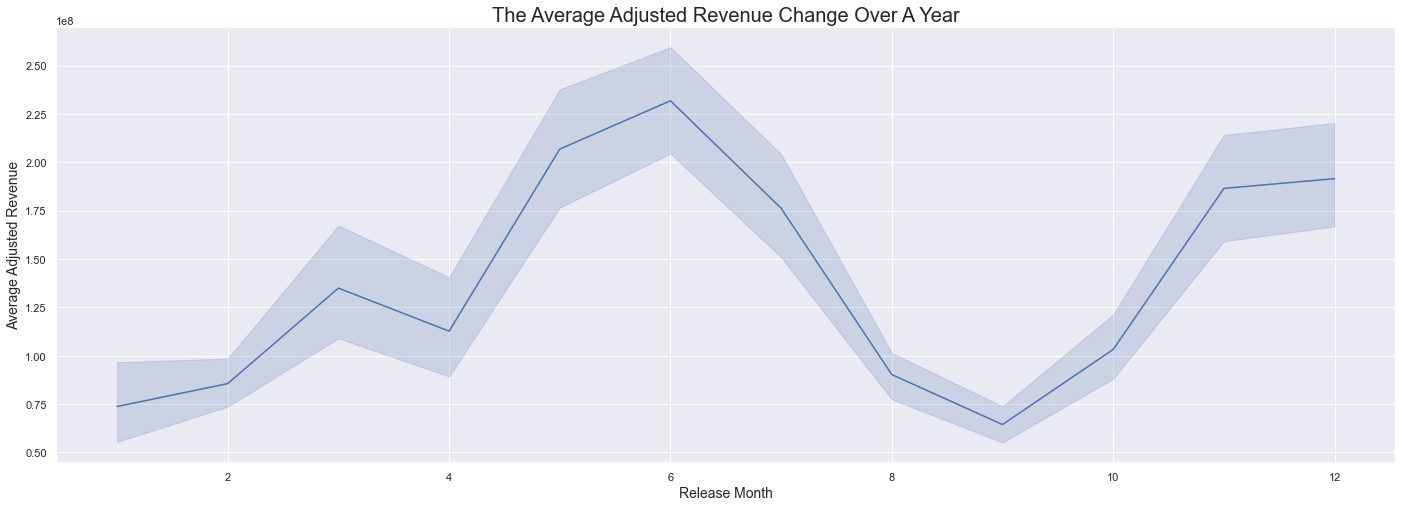

In [36]:
sns.set(rc = {'figure.figsize': (24,8)}), 
cx = sns.lineplot(x=df.release_date_new.dt.month, y='revenue_adj' ,data=df)
cx.set_xlabel('Release Month', fontsize=14)
cx.set_ylabel('Average Adjusted Revenue', fontsize=14)
cx.set_title('The Average Adjusted Revenue Change Over A Year', fontsize = 20);

#### The line chart shows that the revenue is higher during the middle and the end of a year

### Question #3: How does the aveage budget change from 1980 to 2015?

In [37]:
df1980 = df[df['release_year'] >= 1980]

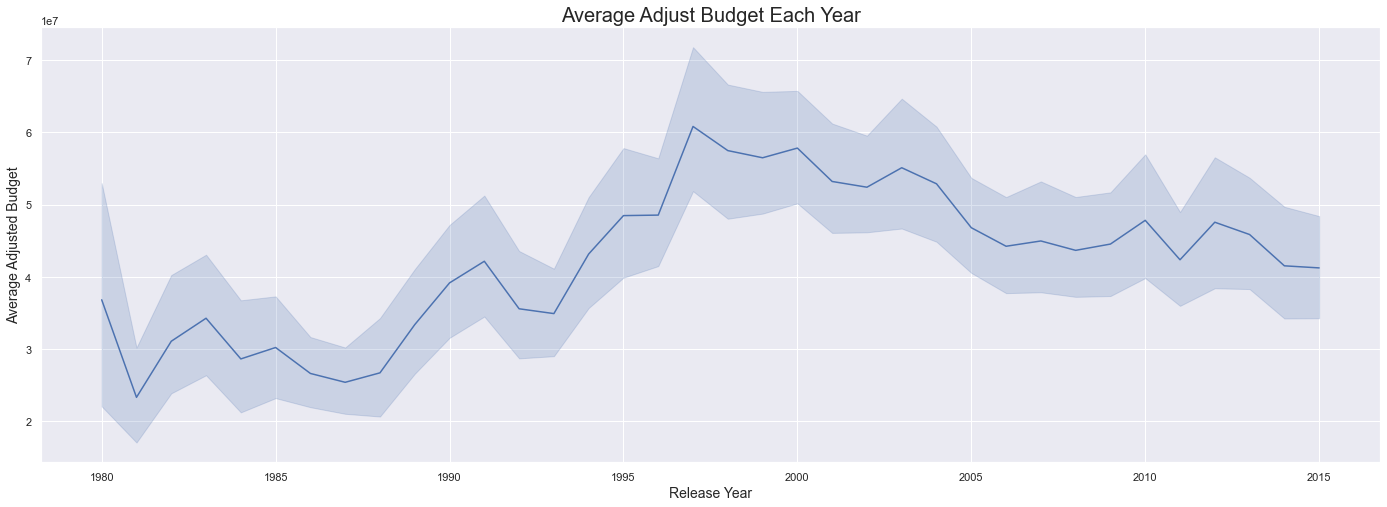

In [38]:
sns.set(rc = {'figure.figsize': (24,8)}), 
ax = sns.lineplot(x=df.release_date_new.dt.year, y='budget_adj' ,data=df1980)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Average Adjusted Budget', fontsize=14)
ax.set_title('Average Adjust Budget Each Year', fontsize = 20);

#### The line chart shows that the budget of movies mainly kept rising until 1997, then It decreased consistently.

### Question #4: To what extent does the vote_average, vote_count and budget_adj influence the revenue_adj?

#### Use multiple linear regress method to solve this question
1. check for linerity

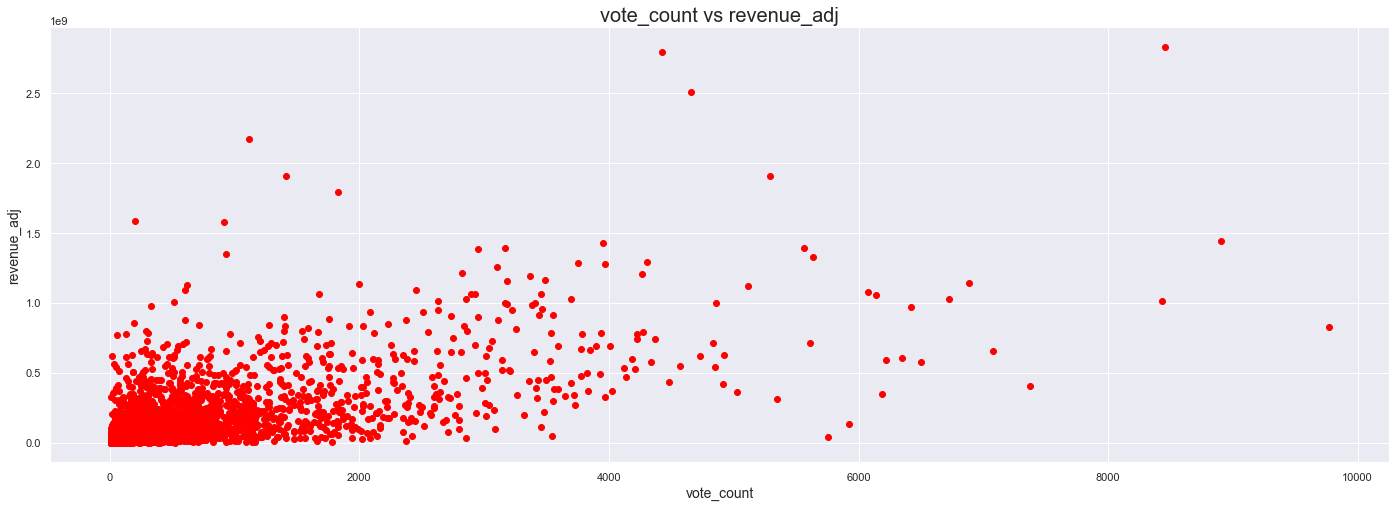

In [39]:
#plot scatter chart using matplotlib
plt.scatter(df['vote_count'],df['revenue_adj'], color='red')
plt.title('vote_count vs revenue_adj', fontsize=20)
plt.xlabel('vote_count', fontsize=14)
plt.ylabel('revenue_adj', fontsize=14)
plt.grid(True)
plt.show()

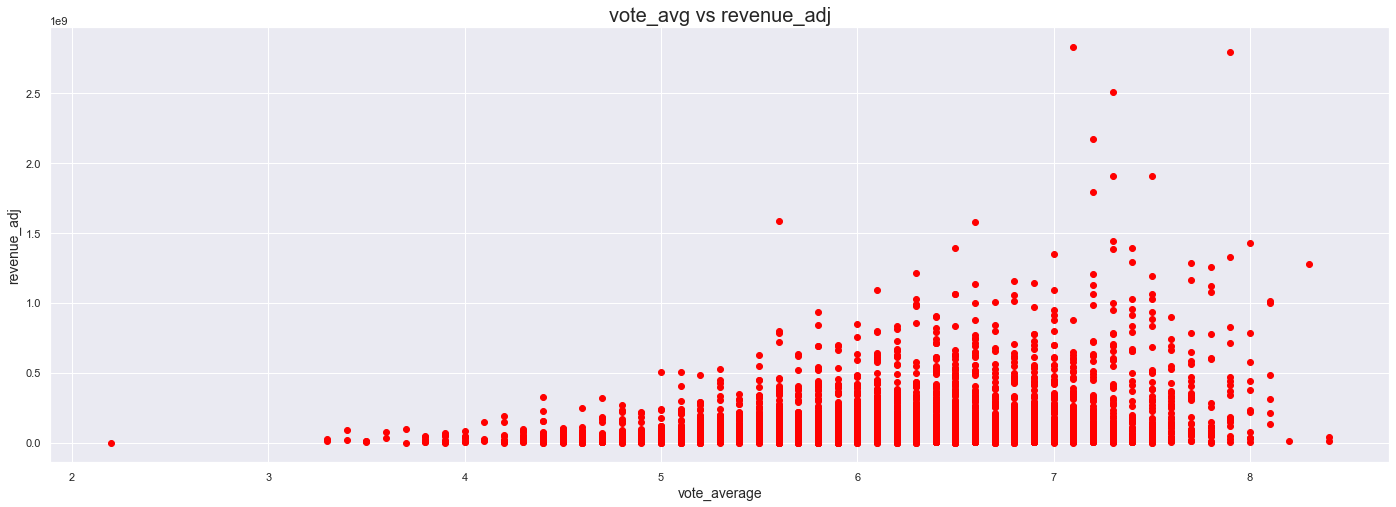

In [40]:
plt.scatter(df['vote_average'],df['revenue_adj'], color='red')
plt.title('vote_avg vs revenue_adj', fontsize=20)
plt.xlabel('vote_average', fontsize=14)
plt.ylabel('revenue_adj', fontsize=14)
plt.grid(True)
plt.show()

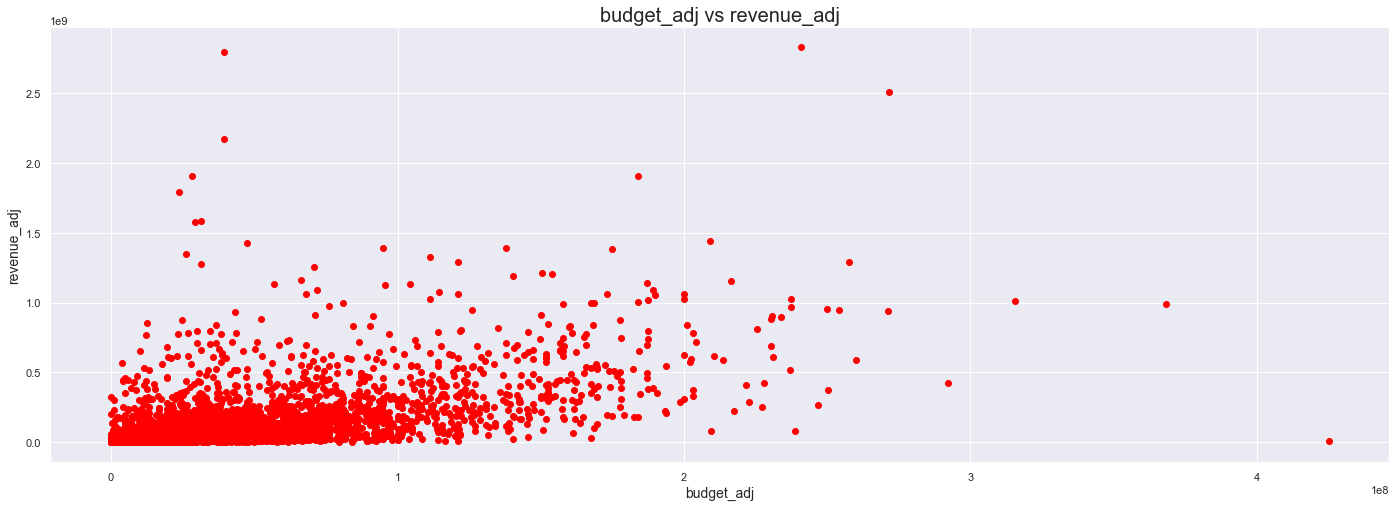

In [41]:
plt.scatter(df['budget_adj'],df['revenue_adj'], color='red')
plt.title('budget_adj vs revenue_adj', fontsize=20)
plt.xlabel('budget_adj', fontsize=14)
plt.ylabel('revenue_adj', fontsize=14)
plt.grid(True)
plt.show()

It is clear that there is a positive correlation between vote_average and revenue_adj, however, the other two charts does not show a clear correlatoin, especially the correlation between budget_adj and revenue_adj is vague.

2. then import some necessary packages for multiple linear regression

In [42]:
from sklearn import linear_model
import statsmodels.api as sm

3. standadrize the variables to reduce the numeric gap.

In [43]:
X = df[['vote_count', 'vote_average', 'budget_adj']]
Y = df['revenue_adj']

In [44]:
#transform both the revenue_adj and budget_adj in millions
X['budget_adj'] = X['budget_adj'] / 1e6
Y = Y / 1e6

C:\Users\Penty\AppData\Local\Temp/ipykernel_8708/988655920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['budget_adj'] = X['budget_adj'] / 1e6


4. do multiple linear regression using sklearn and statsmodels

In [45]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -129.62908896994287
Coefficients: 
 [ 0.11117436 21.91443541  1.65233919]


In [46]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1323.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:43:54   Log-Likelihood:                -24456.
No. Observations:                3797   AIC:                         4.892e+04
Df Residuals:                    3793   BIC:                         4.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -129.6291     21.336     -6.076   

#### Although the Adj. R-squared is only 0.511, which means this model does not fit the data well, we can still tell that there is quite a strong positive correlation between vote_average and revenue_adj.

<a id='conclusions'></a>
## Conclusions
>**1. The distribution of revenue_adj and budget_adj are skewed to the left while the vote_average has an approximately normal distribution.**

>**2. The top 5 popular genres are Action, Drama, Comedy, Thriller and Adventure films.**

>**3. The revenue appears to be higher in the May, July, June, November and December each year.**

>**4. The budget went up to the peak at 1997, then kept decreasing slowly during the following years.**

>**5. Average_vote has a strong postive relation with revenue_adj.**

### Limitations
>**1. the dataset only remains less than 40% after data cleanning phrase.**

>**2. the multiple linear model does not fit the data well.**




<a id='reference'></a>
## References
>1. [Pandas ducumentation](https://pandas.pydata.org/docs/)
>2. [Matplotlib documentation](https://matplotlib.org/stable/users/index.html)
>3. [Seaborn documentation](https://seaborn.pydata.org/)
>4. [Data to Fish - Example of Multiple Linear Regression in Python](https://datatofish.com/multiple-linear-regression-python/)
>5. [W3shcools Python Tutorial](https://www.w3schools.com/python/default.asp)